In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=8,3
sns.set_theme(style="whitegrid", palette="dark")

In [2]:
farm=pd.read_csv(r'C:\Users\admin\Downloads\archive\farm_production_dataset.csv')

In [3]:
farm

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208
...,...,...,...,...,...,...,...,...,...
10268,1984,SK,Tame hay,78.00,2870.0,2087000.0,1800000.0,728000.0,162786
10269,1984,SK,"Wheat, all",176.00,1420.0,11485000.0,20000000.0,8094000.0,2026204
10270,1984,SK,"Wheat, durum",188.00,1200.0,1633000.0,3350000.0,1356000.0,307004
10271,1984,SK,"Wheat, spring",175.00,1460.0,9607000.0,16300000.0,6596000.0,1681225


In [4]:
farm.shape

(10273, 9)

In [5]:
farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10273 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REF_DATE                                10273 non-null  int64  
 1   GEO                                     10273 non-null  object 
 2   Type of crop                            10272 non-null  object 
 3   Average farm price (dollars per tonne)  10243 non-null  float64
 4   Average yield (kilograms per hectare)   10246 non-null  float64
 5   Production (metric tonnes)              10245 non-null  float64
 6   Seeded area (acres)                     9873 non-null   float64
 7   Seeded area (hectares)                  9847 non-null   float64
 8   Total farm value (dollars)              10273 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 722.4+ KB


In [6]:
farm.columns

Index(['REF_DATE', 'GEO', 'Type of crop',
       'Average farm price (dollars per tonne)',
       'Average yield (kilograms per hectare)', 'Production (metric tonnes)',
       'Seeded area (acres)', 'Seeded area (hectares)',
       'Total farm value (dollars)'],
      dtype='object')

In [7]:
farm.columns=['REF_DATE', 'GEO', 'Type_of_crop','Average_farm_price', 'Average_yield', 'Production','Seeded_area_acres', 'Seeded_area_hectares','Total_farm_value']

In [8]:
farm.isnull().sum()

REF_DATE                  0
GEO                       0
Type_of_crop              1
Average_farm_price       30
Average_yield            27
Production               28
Seeded_area_acres       400
Seeded_area_hectares    426
Total_farm_value          0
dtype: int64

In [9]:
farm['Average_farm_price']=farm['Average_farm_price'].fillna(np.mean(pd.to_numeric(farm['Average_farm_price'])))
farm['Average_yield']=farm['Average_yield'].fillna(np.mean(pd.to_numeric(farm['Average_yield'])))
farm['Production']=farm['Production'].fillna(np.mean(pd.to_numeric(farm['Production'])))
farm['Seeded_area_acres']=farm['Seeded_area_acres'].fillna(np.mean(pd.to_numeric(farm['Seeded_area_acres'])))
farm['Seeded_area_hectares']=farm['Seeded_area_hectares'].fillna(np.mean(pd.to_numeric(farm['Seeded_area_hectares'])))
farm['Type_of_crop']=farm['Type_of_crop'].fillna(farm['Type_of_crop'].mode()[0])

In [10]:
farm.dtypes

REF_DATE                  int64
GEO                      object
Type_of_crop             object
Average_farm_price      float64
Average_yield           float64
Production              float64
Seeded_area_acres       float64
Seeded_area_hectares    float64
Total_farm_value          int64
dtype: object

In [11]:
len(farm.columns)

9

In [12]:
farm.describe()

,REF_DATE,Average_farm_price,Average_yield,Production,Seeded_area_acres,Seeded_area_hectares,Total_farm_value
count,10273.000000,10273.000000,10273.000000,1.027300e+04,1.027300e+04,1.027300e+04,1.027300e+04
mean,1947.661053,59.633078,3647.442319,1.010887e+06,1.310067e+06,5.316231e+05,5.490084e+04
std,22.204519,90.787683,8058.243477,3.040528e+06,4.785401e+06,1.936592e+06,2.502413e+05
min,1908.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1929.000000,21.000000,1055.000000,8.300000e+03,1.160000e+04,4.900000e+03,3.690000e+02
50%,1948.000000,43.000000,1485.000000,7.280000e+04,9.390000e+04,3.860000e+04,3.006000e+03
75%,1967.000000,76.000000,2375.000000,5.567000e+05,7.983000e+05,3.302000e+05,1.954100e+04
max,1984.000000,6663.300000,460305.000000,1.336790e+08,3.172035e+08,1.283890e+08,4.654194e+06


In [13]:
farm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
REF_DATE,10273.0,1.947661e+03,2.220452e+01,1908.0,1929.0,1948.0,1967.0,1984.0
Average_farm_price,10273.0,5.963308e+01,9.078768e+01,0.0,21.0,43.0,76.0,6663.3
Average_yield,10273.0,3.647442e+03,8.058243e+03,0.0,1055.0,1485.0,2375.0,460305.0
Production,10273.0,1.010887e+06,3.040528e+06,0.0,8300.0,72800.0,556700.0,133678950.0
Seeded_area_acres,10273.0,1.310067e+06,4.785401e+06,0.0,11600.0,93900.0,798300.0,317203482.0
Seeded_area_hectares,10273.0,5.316231e+05,1.936592e+06,0.0,4900.0,38600.0,330200.0,128389050.0
Total_farm_value,10273.0,5.490084e+04,2.502413e+05,0.0,369.0,3006.0,19541.0,4654194.0


In [14]:
farm.tail()

,REF_DATE,GEO,Type_of_crop,Average_farm_price,Average_yield,Production,Seeded_area_acres,Seeded_area_hectares,Total_farm_value
10268,1984,SK,Tame hay,78.0,2870.0,2087000.0,1.800000e+06,7.280000e+05,162786
10269,1984,SK,"Wheat, all",176.0,1420.0,11485000.0,2.000000e+07,8.094000e+06,2026204
10270,1984,SK,"Wheat, durum",188.0,1200.0,1633000.0,3.350000e+06,1.356000e+06,307004
10271,1984,SK,"Wheat, spring",175.0,1460.0,9607000.0,1.630000e+07,6.596000e+06,1681225
10272,1984,SK,"Wheat, winter remaining",155.0,1730.0,245000.0,1.310067e+06,5.316231e+05,37975


In [15]:
farm.head()

,REF_DATE,GEO,Type_of_crop,Average_farm_price,Average_yield,Production,Seeded_area_acres,Seeded_area_hectares,Total_farm_value
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


<Axes: xlabel='REF_DATE', ylabel='Density'>

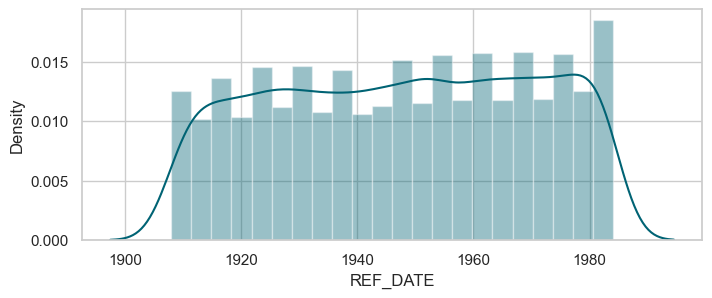

In [16]:
sns.distplot(farm.REF_DATE,color='c')

<Axes: xlabel='Average_farm_price', ylabel='Density'>

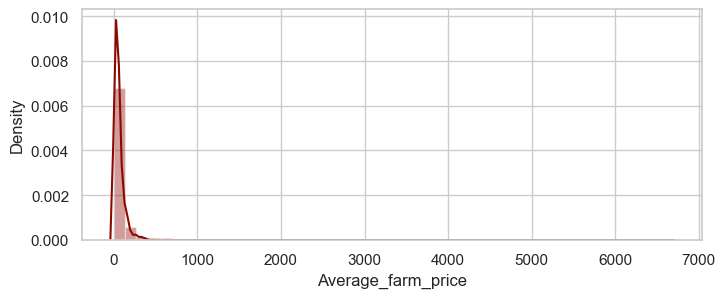

In [17]:
sns.distplot(farm.Average_farm_price,color='r')

<Axes: xlabel='Average_yield', ylabel='Density'>

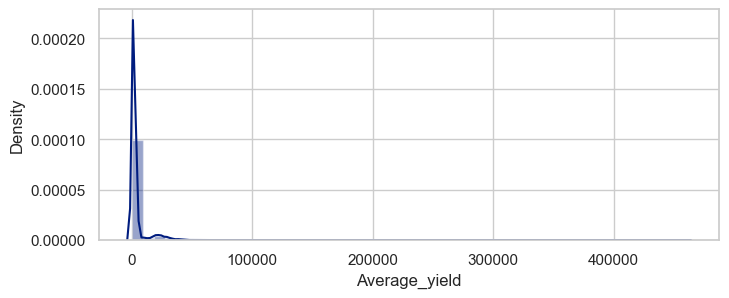

In [18]:
sns.distplot(farm.Average_yield,color='b')

<Axes: xlabel='Seeded_area_acres', ylabel='Density'>

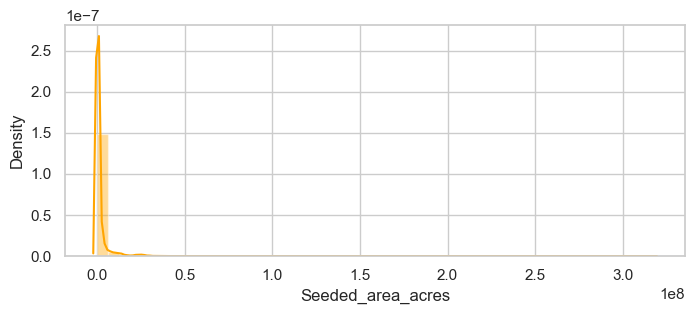

In [19]:
sns.distplot(farm.Seeded_area_acres,color='orange')

<Axes: xlabel='Seeded_area_hectares', ylabel='Density'>

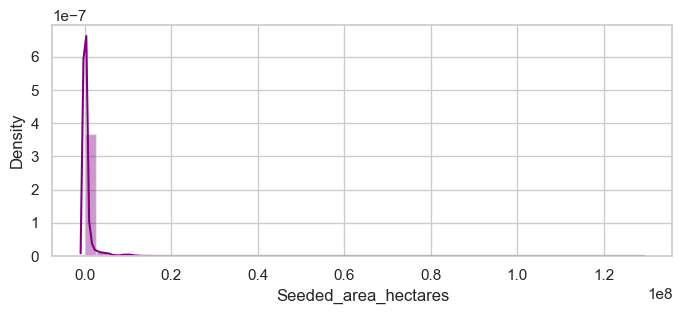

In [20]:
sns.distplot(farm.Seeded_area_hectares,color='purple')

<Axes: xlabel='Total_farm_value', ylabel='Density'>

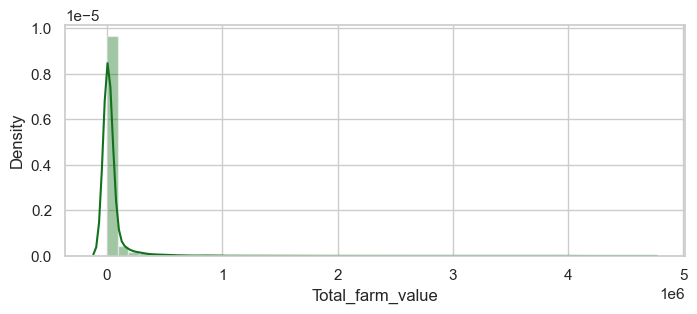

In [21]:
sns.distplot(farm.Total_farm_value,color='g')

In [22]:
farm.head()

,REF_DATE,GEO,Type_of_crop,Average_farm_price,Average_yield,Production,Seeded_area_acres,Seeded_area_hectares,Total_farm_value
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


<Axes: xlabel='GEO', ylabel='count'>

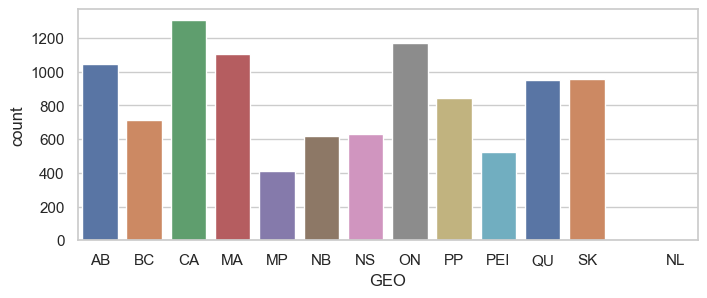

In [23]:
sns.countplot(data=farm,x='GEO',palette='deep')

<Axes: xlabel='Type_of_crop', ylabel='count'>

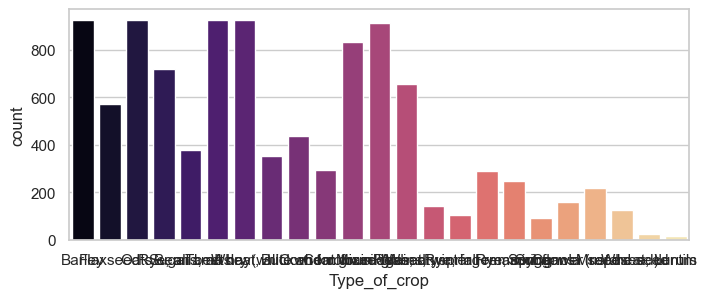

In [24]:
sns.countplot(data=farm,x='Type_of_crop',palette='magma')

In [25]:
farm.head()

,REF_DATE,GEO,Type_of_crop,Average_farm_price,Average_yield,Production,Seeded_area_acres,Seeded_area_hectares,Total_farm_value
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


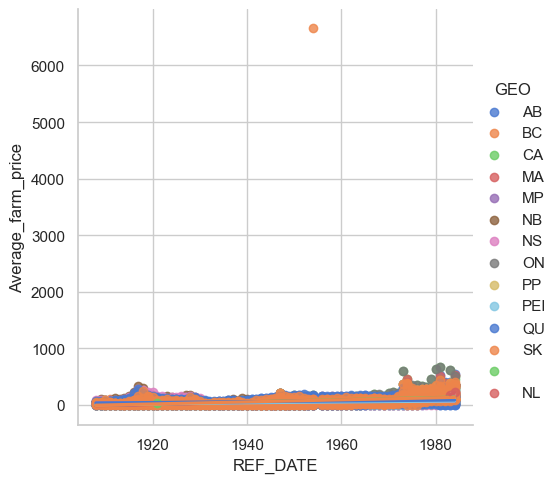

In [26]:
sns.lmplot(data=farm,x='REF_DATE',y='Average_farm_price',palette='muted',hue='GEO')

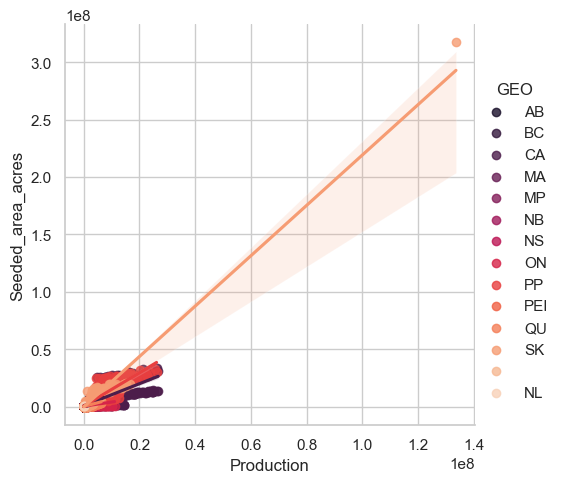

In [27]:
sns.lmplot(data=farm,x='Production',y='Seeded_area_acres',palette='rocket',hue='GEO')

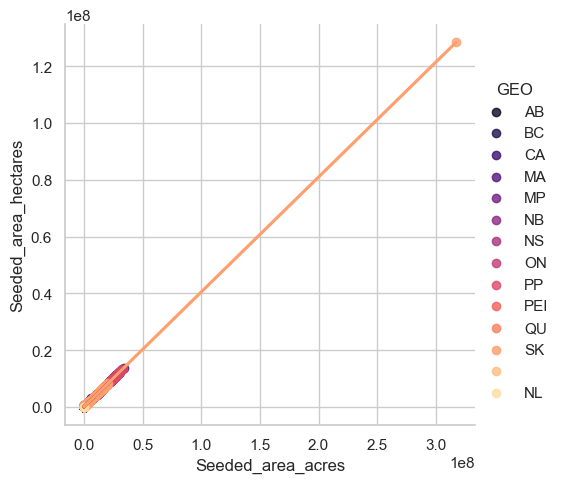

In [28]:
sns.lmplot(data=farm,x='Seeded_area_acres',y='Seeded_area_hectares',palette='magma',hue='GEO')

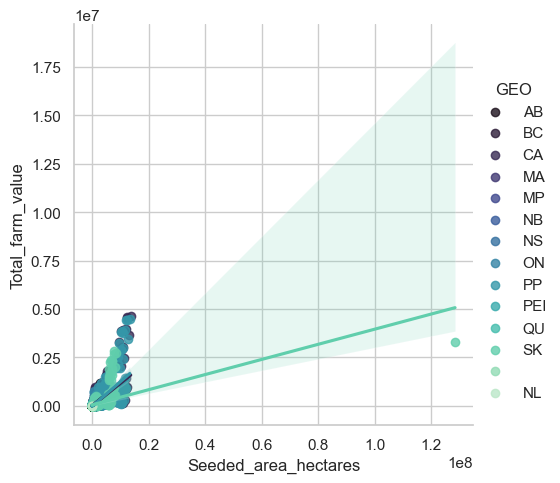

In [29]:
sns.lmplot(data=farm,x='Seeded_area_hectares',y='Total_farm_value',palette='mako',hue='GEO')

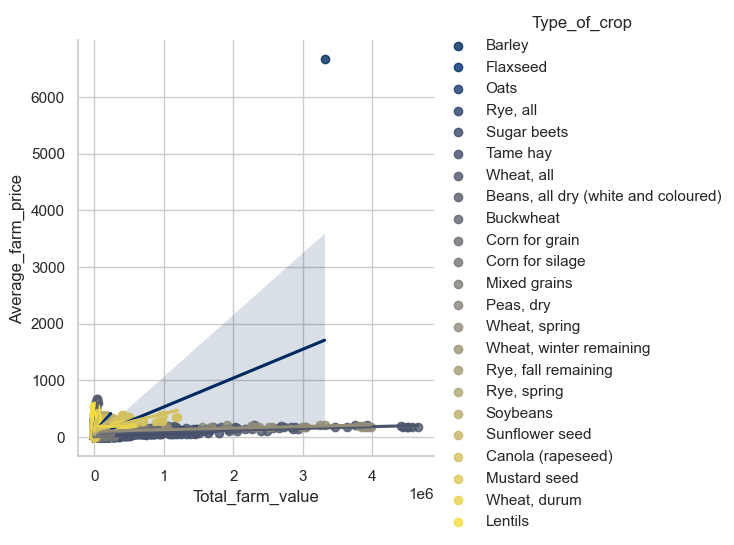

In [30]:
sns.lmplot(data=farm,x='Total_farm_value',y='Average_farm_price',palette='cividis',hue='Type_of_crop')

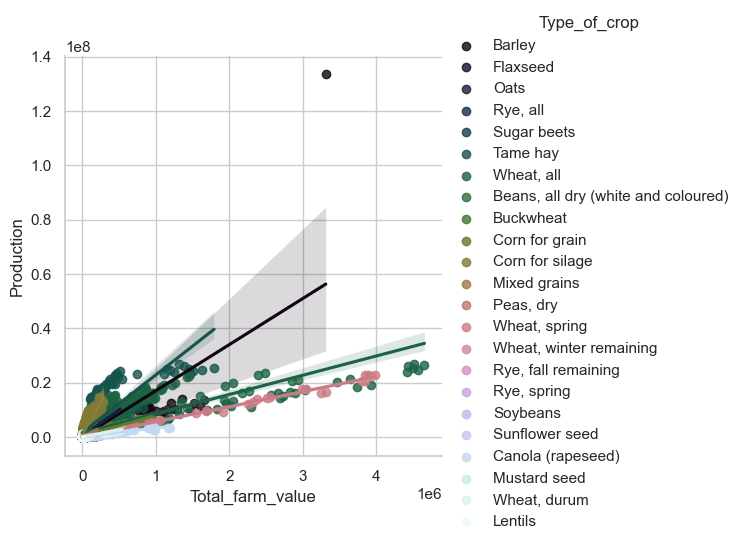

In [31]:
sns.lmplot(data=farm,x='Total_farm_value',y='Production',palette='cubehelix',hue='Type_of_crop')

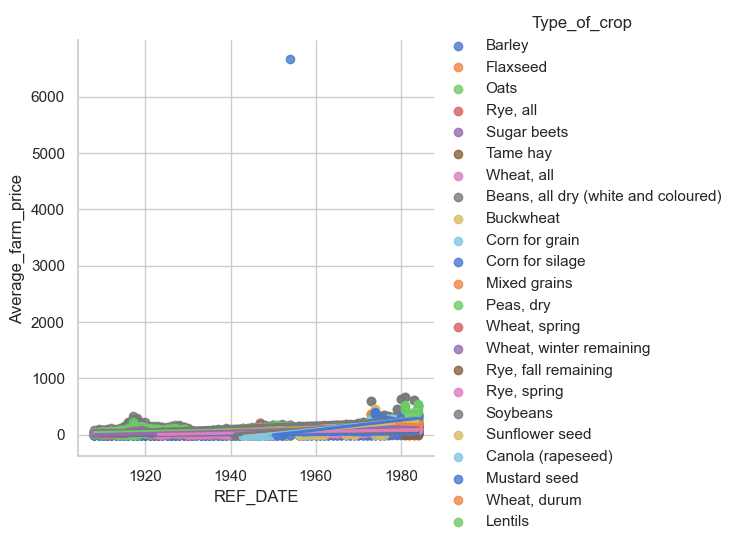

In [32]:
sns.lmplot(data=farm,x='REF_DATE',y='Average_farm_price',palette='muted',hue='Type_of_crop')

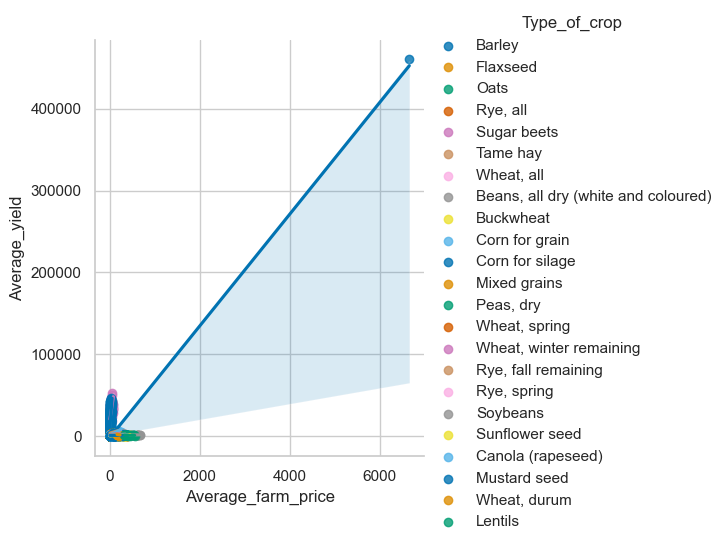

In [33]:
sns.lmplot(data=farm,x='Average_farm_price',y='Average_yield',palette='colorblind',hue='Type_of_crop')

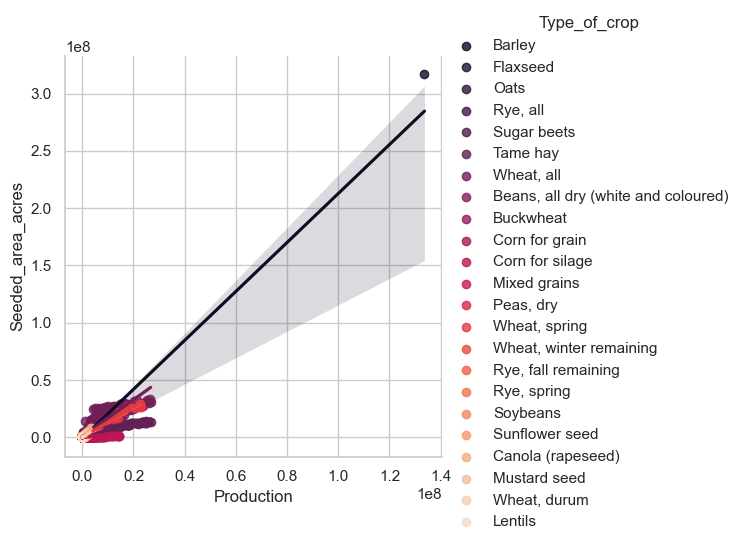

In [34]:
sns.lmplot(data=farm,x='Production',y='Seeded_area_acres',palette='rocket',hue='Type_of_crop')

In [35]:
farm.head()

,REF_DATE,GEO,Type_of_crop,Average_farm_price,Average_yield,Production,Seeded_area_acres,Seeded_area_hectares,Total_farm_value
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


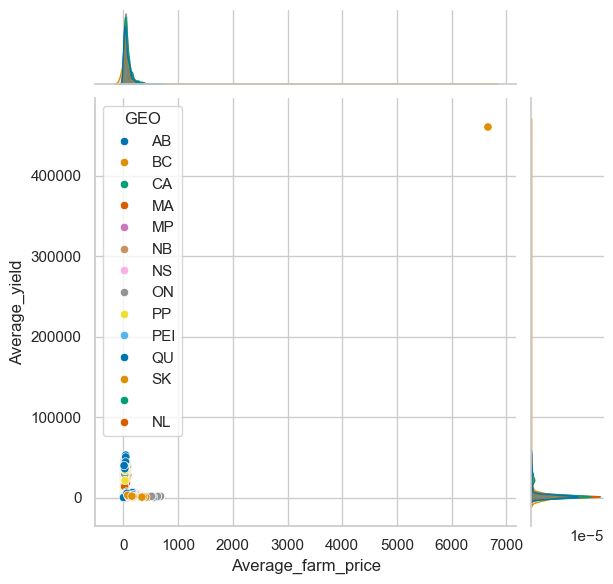

In [36]:
sns.jointplot(data=farm,x='Average_farm_price',y='Average_yield',palette='colorblind',hue='GEO')

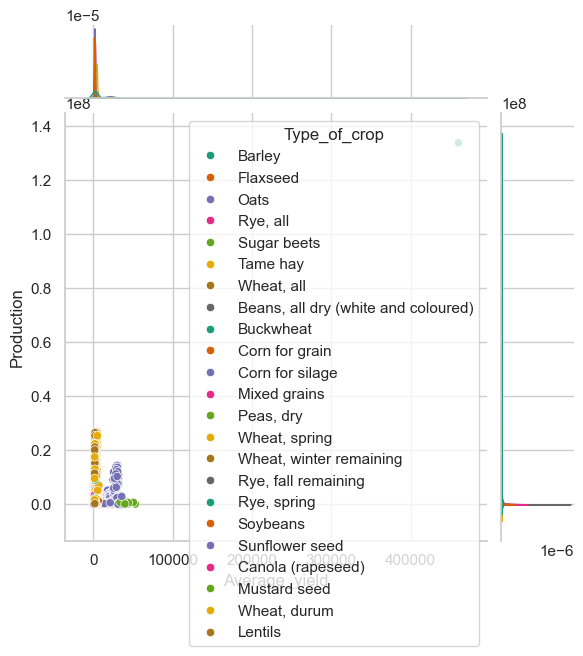

In [37]:
sns.jointplot(data=farm,x='Average_yield',y='Production',palette='Dark2',hue='Type_of_crop')

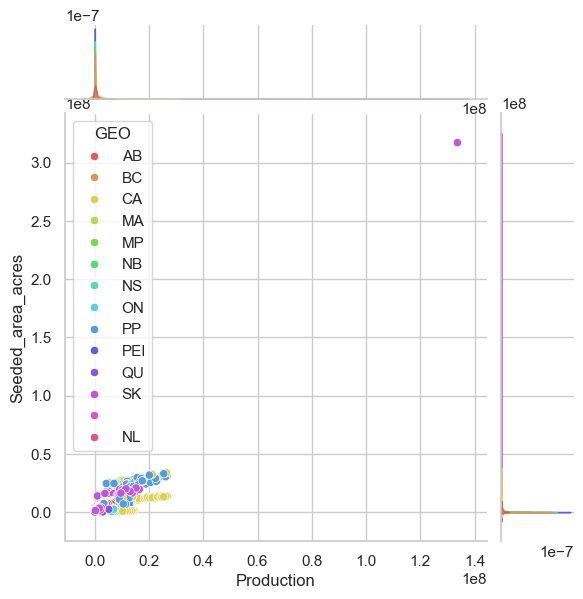

In [38]:
sns.jointplot(data=farm,x='Production',y='Seeded_area_acres',palette='hls',hue='GEO')

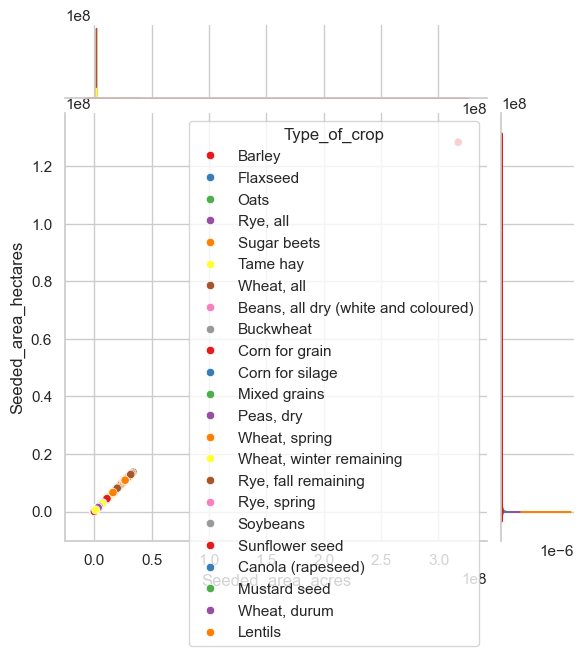

In [39]:
sns.jointplot(data=farm,x='Seeded_area_acres',y='Seeded_area_hectares',palette='Set1',hue='Type_of_crop')

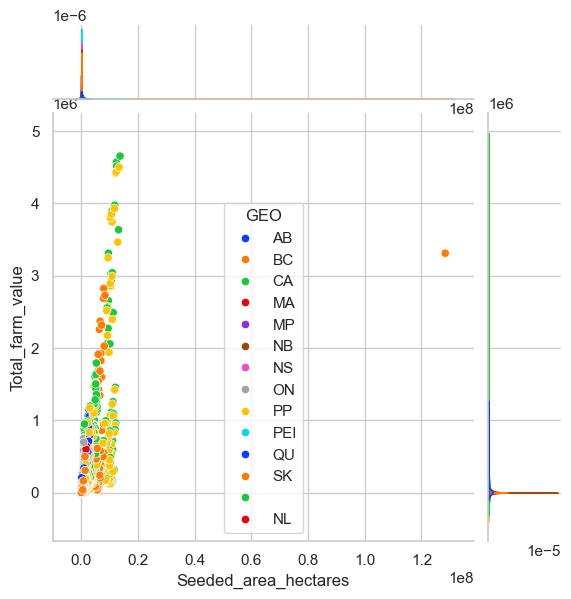

In [40]:
sns.jointplot(data=farm,x='Seeded_area_hectares',y='Total_farm_value',palette='bright',hue='GEO')

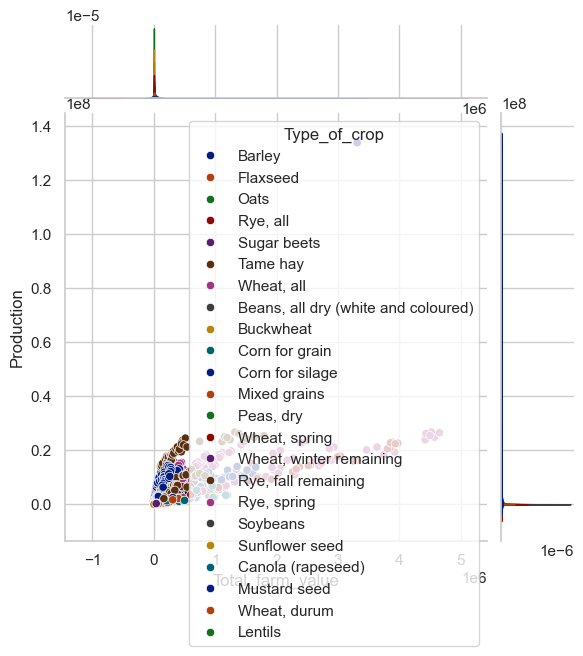

In [41]:
sns.jointplot(data=farm,x='Total_farm_value',y='Production',palette='dark',hue='Type_of_crop')

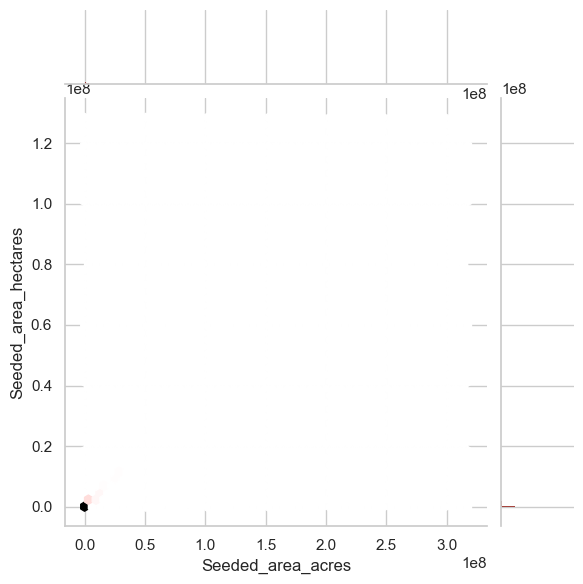

In [42]:
sns.jointplot(data=farm,x='Seeded_area_acres',y='Seeded_area_hectares',color='r',kind='hex')

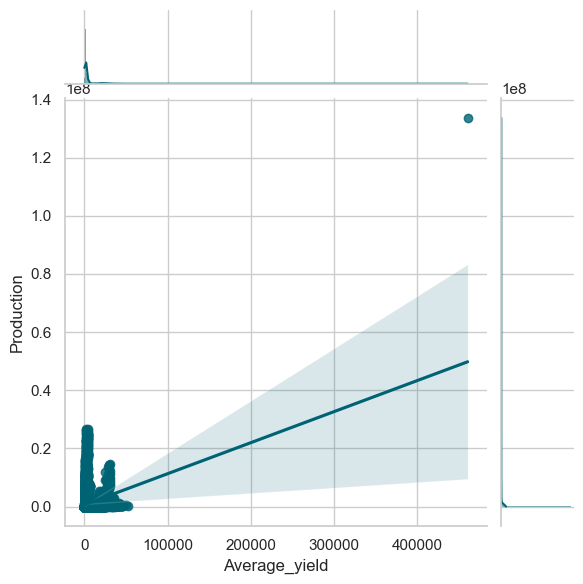

In [43]:
sns.jointplot(data=farm,x='Average_yield',y='Production',color='c',kind='reg')

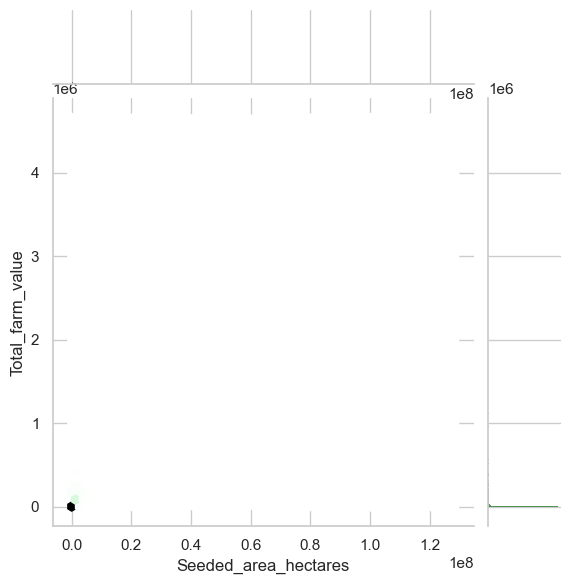

In [44]:
sns.jointplot(data=farm,x='Seeded_area_hectares',y='Total_farm_value',color='g',kind='hex')

In [45]:
farm.head()

,REF_DATE,GEO,Type_of_crop,Average_farm_price,Average_yield,Production,Seeded_area_acres,Seeded_area_hectares,Total_farm_value
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


<Axes: xlabel='GEO', ylabel='Total_farm_value'>

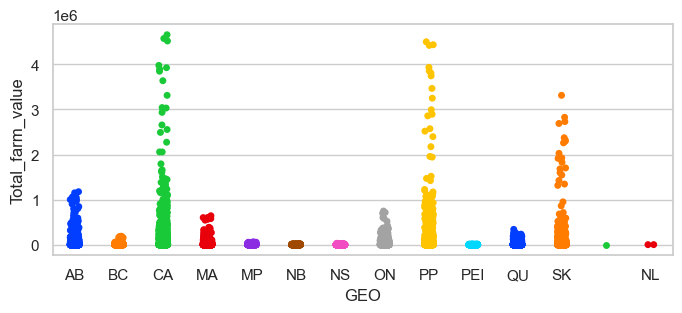

In [46]:
sns.stripplot(data=farm, x='GEO', y='Total_farm_value', palette='bright')

<Axes: xlabel='GEO', ylabel='Average_yield'>

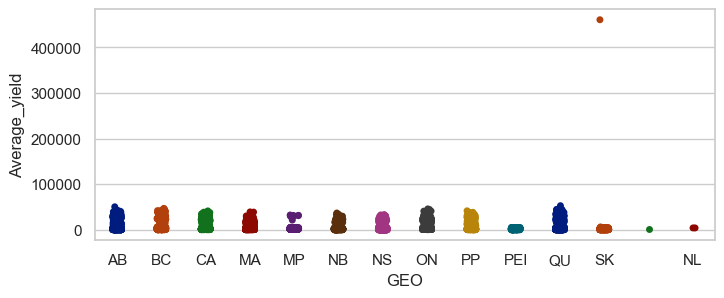

In [47]:
sns.stripplot(data=farm, x='GEO', y='Average_yield',palette='dark')

<Axes: xlabel='GEO', ylabel='Production'>

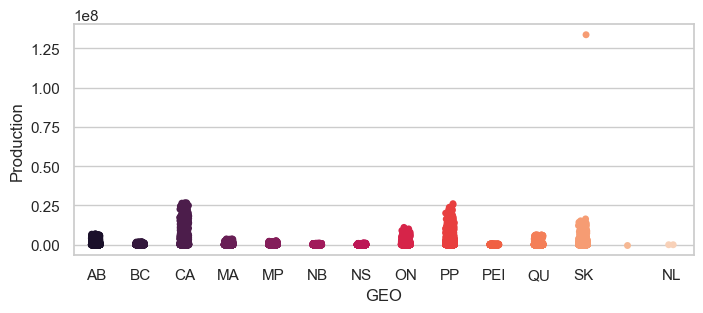

In [48]:
sns.stripplot(data=farm, x='GEO', y='Production', palette='rocket')

<Axes: xlabel='GEO', ylabel='Seeded_area_acres'>

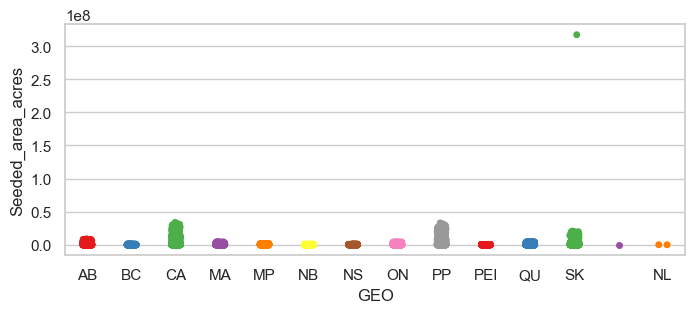

In [49]:
sns.stripplot(data=farm, x='GEO', y='Seeded_area_acres', palette='Set1')

<Axes: xlabel='GEO', ylabel='Seeded_area_hectares'>

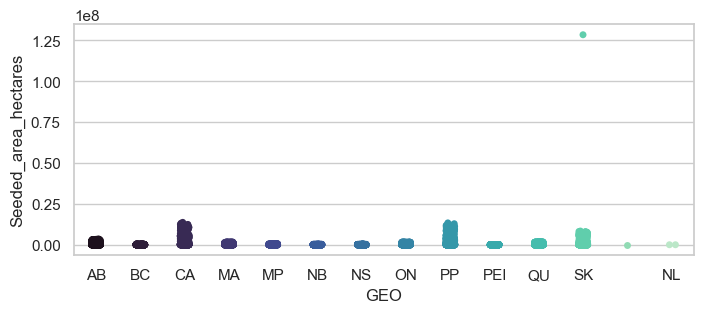

In [50]:
sns.stripplot(data=farm, x='GEO', y='Seeded_area_hectares', palette='mako')

<Axes: xlabel='GEO', ylabel='Total_farm_value'>

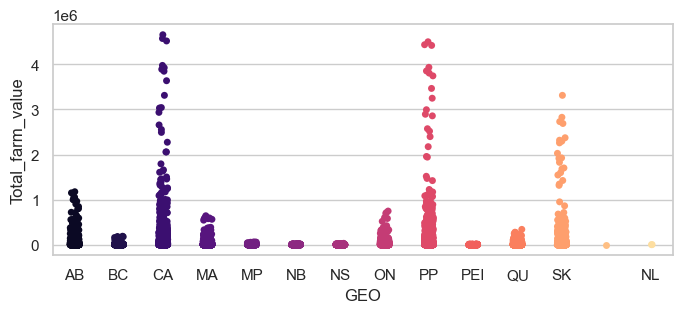

In [51]:
sns.stripplot(data=farm, x='GEO', y='Total_farm_value',palette='magma')